In [47]:
import numpy as np
import scipy.stats as stats # for smallest sample size
import statsmodels.stats.api as sms # for power
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Backgroud

In [ ]:
# For this project, you will be working to understand the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. Your goal is to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

In [ ]:
# objective: 
# improve the conversion rate from 13% to 15%

# A/B Testing Design

1 Hypothesis
H0: These is no different between old page and new page for conversion

2 Grouping
countrl: old page
treatment: new page

3 calculate sample size, period

In [ ]:
# calculate the smallest sample size

In [52]:
# calculate the effect_size in terms of original rate, expected rate.
effect_size = sms.proportion_effectsize(0.13, 0.15)

In [56]:
# required smallest sample size calculation
sample_size = sms.NormalIndPower().solve_power(
    effect_size,
    alpha=0.05,
    power=0.8,
    ratio=1,
)

In [58]:
sample_size = np.ceil(sample_size)
sample_size

4720.0

In [59]:
# A/B testing period calculation
# assume: 
avg_PV = 1000 # per day
# then:
period = sample_size * 2 / avg_PV
period

9.44

# Data Collection

In [ ]:
# (A lot of companies use mature AB testing platform for atream partation)

In [4]:
df = pd.read_csv('/Users/rain/Documents/数分第2期/AB Testing/ab_data.csv')

In [5]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [7]:
df["group"].value_counts()

treatment    147278
control      147202
Name: group, dtype: int64

In [8]:
country_data = pd.read_csv('/Users/rain/Documents/数分第2期/AB Testing/countries.csv')

In [9]:
country_data.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


# Data Cleaning

In [10]:
# missing value
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [11]:
# duplicated for the dataset
df.duplicated().sum()

0

In [12]:
# duplicated for identifier, user_id
df["user_id"].duplicated().sum()

3895

In [13]:
# get the duplicated user_id
df[df["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted
2656,698120,13:42.6,control,old_page,0
2893,773192,55:59.6,treatment,new_page,0
7500,899953,06:54.1,control,new_page,0
8036,790934,32:20.3,treatment,new_page,0
10218,633793,16:00.7,treatment,old_page,0
...,...,...,...,...,...
294309,787083,15:21.0,control,old_page,0
294328,641570,59:27.7,control,old_page,0
294331,689637,34:28.3,control,new_page,0
294355,744456,32:07.1,treatment,new_page,0


In [14]:
# look at one duplicated user_id
df[df["user_id"]==698120]

,user_id,timestamp,group,landing_page,converted
988,698120,09:37.5,control,new_page,0
2656,698120,13:42.6,control,old_page,0


In [15]:
# extract all duplicated user_id
dup_id = df[df["user_id"].duplicated()]["user_id"]

In [16]:
dup_id

2656      698120
2893      773192
7500      899953
8036      790934
10218     633793
           ...  
294309    787083
294328    641570
294331    689637
294355    744456
294478    759899
Name: user_id, Length: 3895, dtype: int64

In [17]:
df["user_id"].isin(dup_id)

0         False
1         False
2         False
3         False
4         False
          ...  
294475    False
294476    False
294477    False
294478     True
294479    False
Name: user_id, Length: 294480, dtype: bool

In [18]:
# delete all dup_id 
df_clean = df[~df["user_id"].isin(dup_id)]
df_clean

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
...,...,...,...,...,...
294474,945152,51:57.1,control,old_page,0
294475,734608,45:03.4,control,old_page,0
294476,697314,20:29.0,control,old_page,0
294477,715931,40:24.5,treatment,new_page,0


In [19]:
# datetime
pd.to_datetime(df_clean['timestamp'],format='%M:%S.%f')

0        1900-01-01 00:11:48.600
1        1900-01-01 00:01:45.200
2        1900-01-01 00:55:06.200
3        1900-01-01 00:28:03.100
4        1900-01-01 00:52:26.200
                   ...          
294474   1900-01-01 00:51:57.100
294475   1900-01-01 00:45:03.400
294476   1900-01-01 00:20:29.000
294477   1900-01-01 00:40:24.500
294479   1900-01-01 00:40:24.500
Name: timestamp, Length: 286690, dtype: datetime64[ns]

In [20]:
pd.to_datetime(df_clean['timestamp'],format='%M:%S.%f').dt.strftime('%M:%S.%f')

0         11:48.600000
1         01:45.200000
2         55:06.200000
3         28:03.100000
4         52:26.200000
              ...     
294474    51:57.100000
294475    45:03.400000
294476    20:29.000000
294477    40:24.500000
294479    40:24.500000
Name: timestamp, Length: 286690, dtype: object

In [21]:
# (usually, we check date to make sure the time span during the A/B testing. )

In [22]:
# make sure the group and landing_page are matched:
# countro -> old-page; treatment -> new_page
pd.crosstab(df_clean['group'],df_clean['landing_page'])

landing_page,new_page,old_page
group,,
control,0,143293
treatment,143397,0


In [23]:
df_merge = pd.merge(
    left=df_clean,
    right=country_data,
    how='left',
    left_on="user_id",
    right_on="user_id",
)

In [24]:
df_merge

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US
...,...,...,...,...,...,...
286685,945152,51:57.1,control,old_page,0,US
286686,734608,45:03.4,control,old_page,0,US
286687,697314,20:29.0,control,old_page,0,US
286688,715931,40:24.5,treatment,new_page,0,UK


In [25]:
df_merge.country.value_counts()

US    200874
UK     71513
CA     14303
Name: country, dtype: int64

In [27]:
pd.crosstab(df_merge['country'],df_merge['landing_page'])

landing_page,new_page,old_page
country,,
CA,7209,7094
UK,35630,35883
US,100558,100316


Analysis

Analysis (no layer)

In [28]:
ab_test = df_merge

In [29]:
ab_test.head()

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


In [57]:
# calculate the conversion rate and standard deviation for each group
conversion_rate = ab_test.groupby('group')['converted'].agg([np.mean, np.std])

In [59]:
conversion_rate.columns = ['conversion_rate', 'std']

In [60]:
conversion_rate

,conversion_rate,std
group,,
control,0.120173,0.325165
treatment,0.118726,0.323467


In [80]:
conversion_rate = conversion_rate.reset_index()

In [81]:
print(conversion_rate.head())

       group  conversion_rate       std
0    control         0.120173  0.325165
1  treatment         0.118726  0.323467


<BarContainer object of 2 artists>

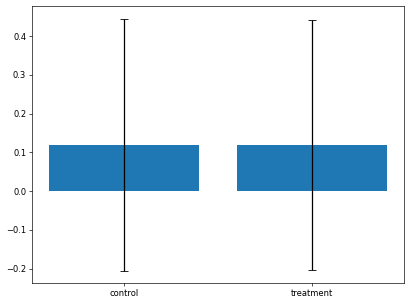

In [88]:
# visualisation
plt.figure(figsize=(8,6), dpi=60)
plt.bar(conversion_rate['group'], conversion_rate['conversion_rate'], yerr=conversion_rate['std'], capsize=5)

In [61]:
# Z Test
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [65]:
control_result = ab_test[ab_test['group']=="control"]['converted']
treatment_result = ab_test[ab_test['group']=="treatment"]['converted']
n_control = control_result.count()
n_treatment = treatment_result.count()

In [67]:
successes = [control_result.sum(),treatment_result.sum()] # number of users who success converted
nobs = [n_control, n_treatment] # count of users

In [72]:
# z and p-value calculation
z_stats, p_value = proportions_ztest(successes, nobs=nobs)

In [74]:
# confidence interval calculation
(lower_control, lower_treatment), (upper_control, upper_treatment) = proportion_confint(successes, nobs=nobs, alpha=0.05)

In [77]:
print(f"z statistic: {z_stats:.3f} ")
print(f"p-value: {p_value:.3f}")
print(f"95% ci for control group: [{lower_control:.3f}, {upper_control:.3f}]")
print(f"95% ci for treatment group: [{lower_treatment:.3f}, {upper_treatment:.3f}]")

z statistic: 1.194 
p-value: 0.232
95% ci for control group: [0.118, 0.122]
95% ci for treatment group: [0.117, 0.120]


# Analysis with country dimentsion

In [95]:
conversion_rate_country = ab_test.groupby(['country', 'group'])['converted'].agg([np.mean, np.std]).reset_index()

In [96]:
conversion_rate_country

,country,group,mean,std
0,CA,control,0.118974,0.323780
1,CA,treatment,0.112360,0.315830
2,UK,control,0.119695,0.324609
3,UK,treatment,0.121162,0.326320
4,US,control,0.120429,0.325465
5,US,treatment,0.118320,0.322988
